In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import seaborn as sns
import scipy

# Figure 1

In [ ]:
# Check out data for figure 1
fn = os.path.join('../../../figures/wbgtmax/Figure_1.csv')
fig1 = pd.read_csv(fn)
fig1.head()

In [ ]:
fig1[fig1['Type'] == 'Total']['wbgt_28_pop_mean'].sum()

In [ ]:
total = fig1[fig1['Type'] == 'Total']['wbgt_28_pop_mean'].sum()
tx_t = fig1[(fig1['STATE'] == 'TX') & (fig1['Type'] == 'Total')]['wbgt_28_pop_mean'].sum()
fl_t = fig1[(fig1['STATE'] == 'FL') & (fig1['Type'] == 'Total')]['wbgt_28_pop_mean'].sum()
tx_s = fig1[(fig1['STATE'] == 'TX') & (fig1['Type'] == 'State')]['wbgt_28_pop_mean'].sum()
fl_s = fig1[(fig1['STATE'] == 'FL') & (fig1['Type'] == 'State')]['wbgt_28_pop_mean'].sum()
print('TX & FL, as pct of Total US exposure', round(tx_t/total*100,1), round(fl_t/total*100,1))
print('TX & FL state prison, as pct of total state exposure', round(tx_s/tx_t*100,1), round(fl_s/tx_t*100,1))

In [ ]:
state_t =  fig1[fig1['Type'] == 'State']['wbgt_28_pop_mean'].sum()
print('state, as pct of Total US exposure', round(state_t/total*100,1), state_t)

In [ ]:
state_t =  fig1[fig1['Type'] == 'County']['wbgt_28_pop_mean'].sum()
print('County, as pct of Total US exposure', round(state_t/total*100,1), state_t)

# Figure 2

In [2]:
# Check out data for figure 1
fn = os.path.join('../../../figures/wbgtmax/Figure_2_heatmap.csv')
fig2 = pd.read_csv(fn)
fig2.head()

,STATE,state,year,wbgt_26_prison,wbgt_28_prison,wbgt_30_prison,wbgt_35_prison,wbgt_26_state,wbgt_28_state,wbgt_30_state,wbgt_35_state,wbgt_26_diff,wbgt_28_diff,wbgt_30_diff,wbgt_35_diff
0,AL,1,1982,69.780621,10.551237,0.011710,0,67.253255,10.088192,0.000000,0,2.527366,0.463045,0.011710,0
1,AL,1,1983,57.591714,23.245752,1.325887,0,56.221087,21.890994,1.310454,0,1.370627,1.354758,0.015434,0
2,AL,1,1984,51.604245,5.294824,0.000000,0,46.808044,3.940633,0.000000,0,4.796201,1.354191,0.000000,0
3,AL,1,1985,64.565866,10.436036,0.399331,0,60.946918,9.166540,0.342430,0,3.618949,1.269496,0.056901,0
4,AL,1,1986,81.106344,21.759431,1.314899,0,76.131891,19.732537,1.455672,0,4.974453,2.026894,-0.140773,0


In [ ]:
np.unique(fig2['STATE'])

In [10]:
metric = 'wbgt_28'
geo = 'AL'

In [ ]:
ans = fig2[fig2['STATE'] == geo][metric+'_diff'].mean()
print('Avg. dif 1981 - 2020 USA:', round(ans, 1))

In [ ]:
ans = fig2[fig2['STATE'] == geo][metric+'_diff'].std()
print('std. dif 1981 - 2020 USA:', round(ans,1))

In [ ]:
ans = fig2[fig2['STATE'] == geo][metric+'_diff'].max()
print('Avg. dif 1981 - 2020 USA:', ans)

In [11]:
fig2[fig2['STATE'] == geo][['year',metric+'_diff']].head(50)

,year,wbgt_28_diff
0,1982,0.463045
1,1983,1.354758
2,1984,1.354191
3,1985,1.269496
4,1986,2.026894
5,1987,3.978142
6,1988,2.172331
7,1989,3.281243
8,1990,5.757341
9,1991,4.566417


In [5]:
geo = 'AL'

In [6]:
fig2[fig2['STATE'] == geo]['wbgt_28_diff'].mean()

12.653107117613443

LinregressResult(slope=-0.022820760910144917, intercept=65.02789696861257, rvalue=-0.026349148748885658, pvalue=0.873492271561509, stderr=0.14233504955331375, intercept_stderr=284.6746063475146)
LinregressResult(slope=-0.08861797191066884, intercept=189.01135749527228, rvalue=-0.14091272720586404, pvalue=0.39219166099096936, stderr=0.10235653587433534, intercept_stderr=204.71631301331354)


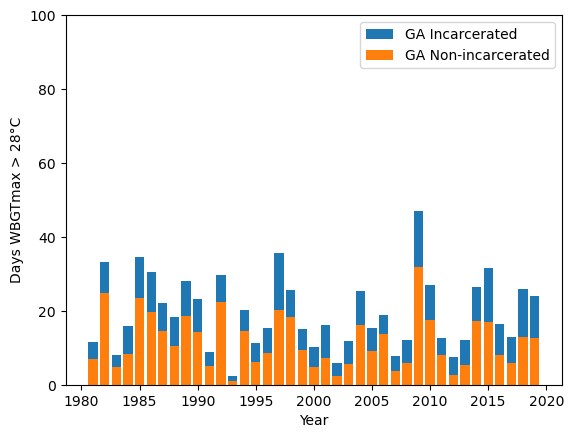

In [22]:
# GA Prison
geo = 'GA'
years = list(range(1981, 2019 + 1, 1))
prison = fig2[fig2['STATE'] == geo][metric+'_prison']
data = pd.DataFrame({'x': years, 'y': prison})
plt.bar(data['x'], data['y'])
plt.ylim(0,100)
print(scipy.stats.linregress(data['x'], data['y']))

# GA Average
geo = 'GA'
years = list(range(1981, 2019 + 1, 1))
prison = fig2[fig2['STATE'] == geo][metric+'_state']
data = pd.DataFrame({'x': years, 'y': prison})
plt.bar(data['x'], data['y'])
plt.ylim(0,100)
print(scipy.stats.linregress(data['x'], data['y']))

# prison = fig2[fig2['STATE'] == geo][metric+'_state']
# plt.bar(years, prison)

# plt.ylim(0, 70)
plt.xlabel('Year')
plt.ylabel('Days WBGTmax > 28°C')
plt.legend(labels = ['GA Incarcerated', 'GA Non-incarcerated'])

# Old code

In [4]:
for geo in np.unique(fig2['STATE']):
    print(geo, len(fig2[fig2['STATE'] == geo]))

AL 78
AR 39
AZ 39
CA 39
CO 39
CT 39
DC 39
DE 39
FL 39
GA 39
IA 39
ID 39
IL 39
IN 39
KS 39
KY 39
LA 39
MA 39
MD 39
ME 39
MI 39
MN 39
MO 39
MS 39
MT 39
NC 39
ND 39
NE 39
NH 39
NJ 39
NM 39
NV 39
NY 39
OH 39
OK 39
OR 39
PA 39
RI 39
SC 39
SD 39
TN 39
TX 39
USA 39
UT 39
VA 39
VT 39
WA 39
WI 39
WV 39
WY 39


In [ ]:
geo = 'AL'
years = list(range(1981, 2019 + 1, 1))
prison = fig2[fig2['STATE'] == geo][metric+'_prison']
data = pd.DataFrame({'x': years, 'y': prison})

sns.regplot(data, x = 'x', y = 'y', fit_reg = True)
plt.ylim(0,100)
print(scipy.stats.linregress(data['x'], data['y']))
c
# prison = fig2[fig2['STATE'] == geo][metric+'_state']
# plt.bar(years, prison)

# plt.ylim(0, 70)